# Load libraries and dataset

---



In [1]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
import random
import os


Using TensorFlow backend.
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# load data set
santander_train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0106/train.csv")
santander_test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0106/test.csv")

# Exploratory data analysis

---



In [3]:
# view random 5 records from train dataset
print(santander_train.info())
santander_train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
6962,train_6962,1,14.9336,1.2655,8.6555,6.7244,11.1839,-10.6182,6.6219,16.8936,...,10.7852,6.1238,1.3709,2.2528,22.9999,1.1482,-2.8665,10.6950,13.4711,0.0542
42886,train_42886,0,9.9578,7.8406,8.5347,5.6595,10.7248,-1.3859,5.3352,16.3973,...,-0.2698,4.1097,3.9513,-0.6326,15.5537,-1.5006,-4.4750,7.7963,19.4598,10.2961
81391,train_81391,0,9.9982,-2.1641,13.9853,10.9516,10.8750,-1.0496,5.5921,19.3030,...,2.4597,10.6782,2.1746,5.9914,13.8102,-1.2739,5.0127,7.7782,9.6771,0.3126
40547,train_40547,0,10.5314,1.0528,10.6692,6.6427,9.3425,-7.5437,6.9546,18.3162,...,5.5991,8.4720,3.4234,5.1231,16.8987,1.0995,9.2488,6.5493,14.0953,-19.6290
76597,train_76597,0,13.3954,-7.1123,12.6526,6.5166,10.2945,-4.0533,4.8879,23.5008,...,8.0371,6.7874,2.6610,-4.9383,20.1315,2.3369,0.5459,8.5351,17.5577,12.3562


In [4]:
# view random 5 records from test dataset
print(santander_test.info())
santander_test.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
181930,test_181930,6.4878,-9.8429,12.0218,7.8614,8.3899,-14.1334,4.3718,21.9922,4.6989,...,-2.5124,8.8216,2.9751,9.7237,14.0464,-0.2979,-5.5474,9.0002,10.4226,-8.8602
18449,test_18449,14.9670,6.6212,8.8402,7.0893,8.9842,-7.3631,4.4077,17.8975,-3.1912,...,9.7530,4.4191,2.3636,2.0528,18.3464,0.3735,-1.7086,9.2165,8.5629,10.7562
99938,test_99938,15.0108,-1.3339,12.1775,5.5395,12.4572,-10.3423,6.1664,19.6881,-0.3759,...,5.1795,4.7975,1.4963,-2.0101,18.0749,0.6951,-6.3518,9.0667,19.1569,-15.4426
186735,test_186735,11.3315,-2.3283,7.5639,8.3216,6.9668,-14.7832,5.8356,12.9202,5.5704,...,-4.5145,8.3049,1.1551,0.5921,17.6986,-1.0254,4.6898,8.5707,17.2884,-4.7038
44441,test_44441,14.9050,3.2079,11.5501,5.8747,11.9160,2.8274,5.7472,20.6436,0.9248,...,7.9948,5.8950,2.3930,8.2370,17.9256,-0.9229,4.5291,8.5980,16.1538,-2.1868


In [5]:
# view column names
santander_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [6]:
# drop ID_code variable as it can't help in prediction
santander_train = santander_train.drop(columns = ['ID_code'])

In [7]:
# re-order columns - set target to last column
cols = santander_train.columns.tolist()
cols = cols[1:201] + cols[0:1]
santander_train = santander_train[cols]


In [8]:
# dataset info
santander_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537,0.100490
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015,0.300653
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800,0.000000
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475,0.000000
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550,0.000000
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800,0.000000
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700,1.000000


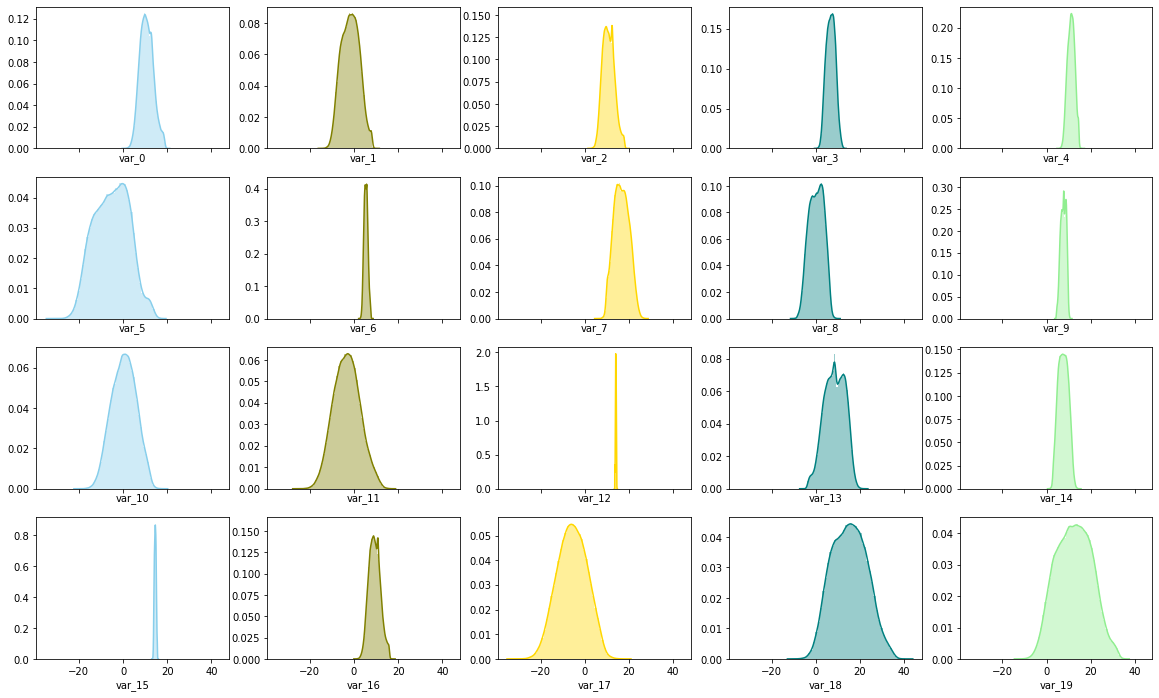

In [9]:
# histogram for few variables 
f, axes = plt.subplots(4, 5, figsize=(20, 12), sharex=True)
# first row
sns.distplot( santander_train['var_0'] , color="skyblue", ax=axes[0, 0])
sns.distplot( santander_train["var_1"] , color="olive", ax=axes[0, 1])
sns.distplot( santander_train["var_2"] , color="gold", ax=axes[0, 2])
sns.distplot( santander_train["var_3"] , color="teal", ax=axes[0, 3])
sns.distplot( santander_train["var_4"] , color="lightgreen", ax=axes[0, 4])
# second row
sns.distplot( santander_train['var_5'] , color="skyblue", ax=axes[1, 0])
sns.distplot( santander_train["var_6"] , color="olive", ax=axes[1, 1])
sns.distplot( santander_train["var_7"] , color="gold", ax=axes[1, 2])
sns.distplot( santander_train["var_8"] , color="teal", ax=axes[1, 3])
sns.distplot( santander_train["var_9"] , color="lightgreen", ax=axes[1, 4])
# third row
sns.distplot( santander_train['var_10'] , color="skyblue", ax=axes[2, 0])
sns.distplot( santander_train["var_11"] , color="olive", ax=axes[2, 1])
sns.distplot( santander_train["var_12"] , color="gold", ax=axes[2, 2])
sns.distplot( santander_train["var_13"] , color="teal", ax=axes[2, 3])
sns.distplot( santander_train["var_14"] , color="lightgreen", ax=axes[2, 4])
# fourth row
sns.distplot( santander_train['var_15'] , color="skyblue", ax=axes[3, 0])
sns.distplot( santander_train["var_16"] , color="olive", ax=axes[3, 1])
sns.distplot( santander_train["var_17"] , color="gold", ax=axes[3, 2])
sns.distplot( santander_train["var_18"] , color="teal", ax=axes[3, 3])
sns.distplot( santander_train["var_19"] , color="lightgreen", ax=axes[3, 4])


In [10]:
# take backup
santander_train_backup = santander_train
# santander_train = santander_train_backup

# Missing value analysis

---



In [11]:
# view missing values count for each variable
total = santander_train.isnull().sum().sort_values(ascending=False)
percent = (santander_train.isnull().sum()/santander_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
target,0,0.0
var_62,0,0.0
var_72,0,0.0
var_71,0,0.0
var_70,0,0.0
var_69,0,0.0
var_68,0,0.0
var_67,0,0.0
var_66,0,0.0
var_65,0,0.0


**In our dataset we don't have any missing values so no need to do further process for missing value analysis**

---



# Outlier Analysis

---



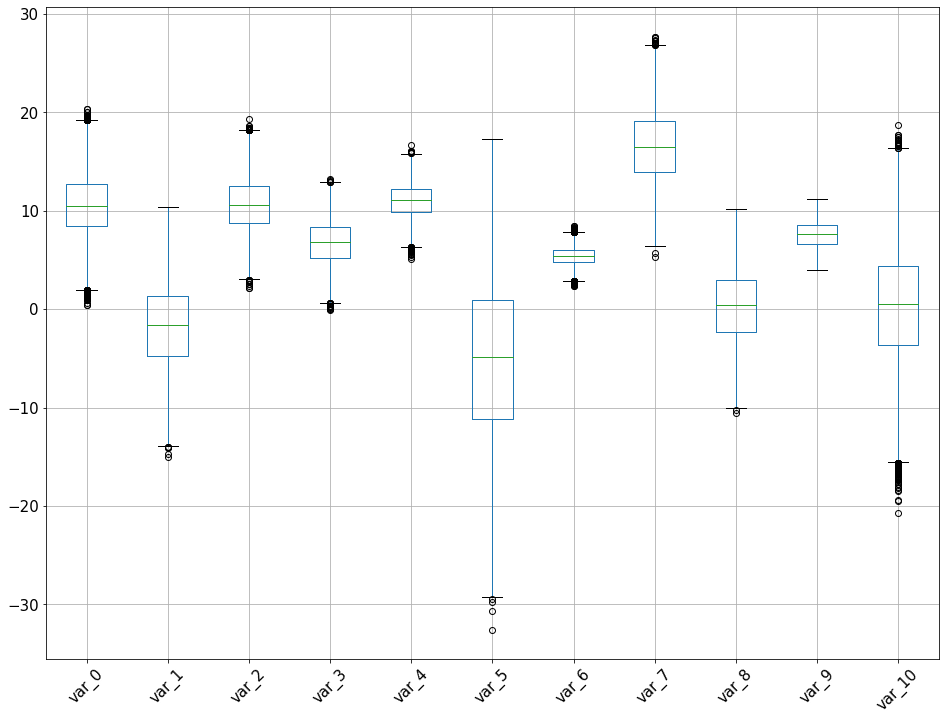

In [12]:
# plot outliers for few variables
plt.figure(figsize=(16, 12))
santander_train.boxplot(column=['var_0', 'var_1', 'var_2','var_3','var_4', 'var_5', 'var_6','var_7','var_8', 'var_9','var_10'] , fontsize = 15, rot = 45)

In [13]:
# Detect outliers and replace with NA
def detect_outlier(df):
  for i in range(0, santander_train.shape[1] - 1):
    column_name = santander_train.columns[i]
    print(column_name)

    # find inter-quartile range
    q75, q25 = np.percentile(santander_train.iloc[:,i], [75,25])
    iqr = q75 - q25

    # find lower and upper fence
    lower_fence = round(q25 - (1.5*iqr),4)
    upper_fence = round(q75 + (1.5*iqr),4)
    print('lower_fence :', lower_fence)
    print('upper_fence :', upper_fence)

    # count outliers
    lower_outlier = santander_train.loc[santander_train[column_name] < lower_fence].shape[0]
    upper_outlier = santander_train.loc[santander_train[column_name] > upper_fence].shape[0]
    print('No of outlier in variable# ' + str(column_name) + " - " ,  lower_outlier + upper_outlier)

    # replace outlier with NA
    santander_train.loc[santander_train[column_name] < lower_fence, : column_name] = np.nan
    santander_train.loc[santander_train[column_name] > upper_fence, : column_name] = np.nan


In [14]:
# call detect outlier function
detect_outlier(santander_train)

var_0
lower_fence : 1.9973
upper_fence : 19.2147
No of outlier in variable# var_0 -  104
var_1
lower_fence : -13.888
upper_fence : 10.5066
No of outlier in variable# var_1 -  6
var_2
lower_fence : 3.0311
upper_fence : 18.208
No of outlier in variable# var_2 -  49
var_3
lower_fence : 0.649
upper_fence : 12.9291
No of outlier in variable# var_3 -  22
var_4
lower_fence : 6.3162
upper_fence : 15.8281
No of outlier in variable# var_4 -  76
var_5
lower_fence : -29.3881
upper_fence : 19.1125
No of outlier in variable# var_5 -  4
var_6
lower_fence : 2.9148
upper_fence : 7.8559
No of outlier in variable# var_6 -  113
var_7
lower_fence : 6.2051
upper_fence : 26.8416
No of outlier in variable# var_7 -  19
var_8
lower_fence : -10.2014
upper_fence : 10.8214
No of outlier in variable# var_8 -  2
var_9
lower_fence : 3.6704
upper_fence : 11.5329
No of outlier in variable# var_9 -  0
var_10
lower_fence : -15.5618
upper_fence : 16.3497
No of outlier in variable# var_10 -  125
var_11
lower_fence : -20.05

var_91
lower_fence : 6.5227
upper_fence : 7.4486
No of outlier in variable# var_91 -  22
var_92
lower_fence : 0.4154
upper_fence : 25.0951
No of outlier in variable# var_92 -  41
var_93
lower_fence : 9.0717
upper_fence : 12.0689
No of outlier in variable# var_93 -  889
var_94
lower_fence : 2.4363
upper_fence : 19.4808
No of outlier in variable# var_94 -  0
var_95
lower_fence : -1.8122
upper_fence : 1.6138
No of outlier in variable# var_95 -  162
var_96
lower_fence : -11.7367
upper_fence : 40.353
No of outlier in variable# var_96 -  6
var_97
lower_fence : -19.9396
upper_fence : 57.0181
No of outlier in variable# var_97 -  8
var_98
lower_fence : -0.2222
upper_fence : 3.7507
No of outlier in variable# var_98 -  172
var_99
lower_fence : -6.0582
upper_fence : 4.4805
No of outlier in variable# var_99 -  85
var_100
lower_fence : -33.1949
upper_fence : 20.1283
No of outlier in variable# var_100 -  176
var_101
lower_fence : -1.7758
upper_fence : 28.6659
No of outlier in variable# var_101 -  0
v

var_180
lower_fence : -18.179
upper_fence : 12.5014
No of outlier in variable# var_180 -  34
var_181
lower_fence : 6.1948
upper_fence : 13.9012
No of outlier in variable# var_181 -  66
var_182
lower_fence : -26.4098
upper_fence : 27.8446
No of outlier in variable# var_182 -  5
var_183
lower_fence : -4.6334
upper_fence : 22.1839
No of outlier in variable# var_183 -  23
var_184
lower_fence : -15.026
upper_fence : 40.1454
No of outlier in variable# var_184 -  43
var_185
lower_fence : -17.514
upper_fence : 9.5634
No of outlier in variable# var_185 -  231
var_186
lower_fence : -0.0027
upper_fence : 17.9117
No of outlier in variable# var_186 -  446
var_187
lower_fence : -45.8138
upper_fence : 25.1427
No of outlier in variable# var_187 -  3
var_188
lower_fence : 3.736
upper_fence : 27.1107
No of outlier in variable# var_188 -  23
var_189
lower_fence : -2.1871
upper_fence : 3.6849
No of outlier in variable# var_189 -  15
var_190
lower_fence : -9.7564
upper_fence : 16.1037
No of outlier in vari

,Total,Percent
var_0,24885,0.124425
var_1,24793,0.123965
var_2,24787,0.123935
var_3,24750,0.123750
var_4,24732,0.123660


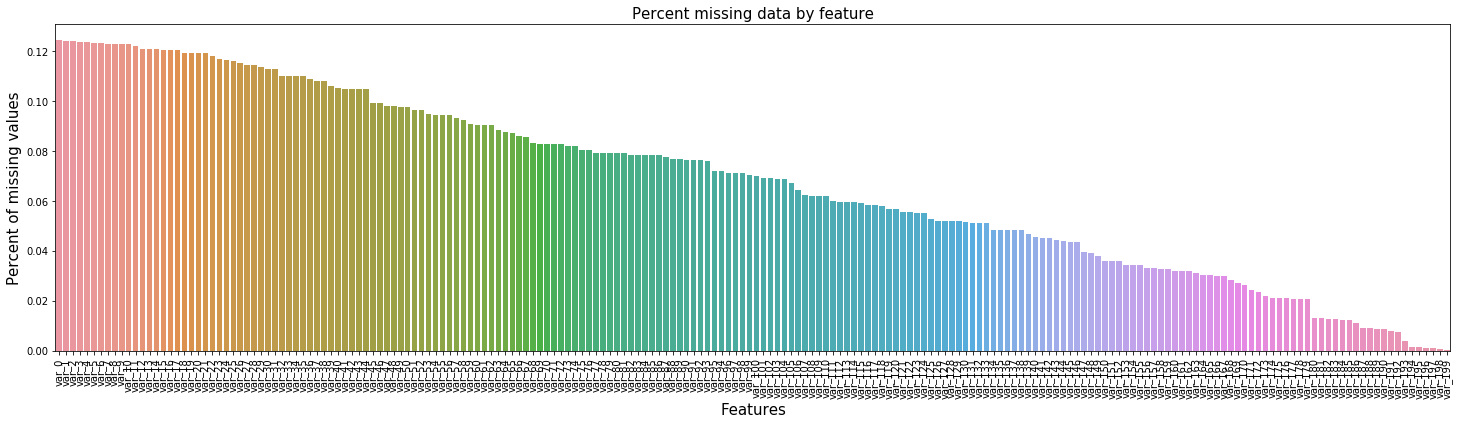

In [15]:
# Now, we have missing values
# view missing values count against variable
total = santander_train.isnull().sum().sort_values(ascending=False)
percent = (santander_train.isnull().sum()/santander_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# takes only percent > 0 records
missing_data = missing_data[missing_data['Percent'] > 0]

# bar plot of missing value data
f, ax = plt.subplots(figsize=(25, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y = missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [16]:
# impute with mean method
santander_train.fillna(santander_train.mean(), inplace=True)

In [17]:
# verify missing values are filled by mean method
santander_train.isnull().sum().sort_values(ascending=False)

target     0
var_62     0
var_72     0
var_71     0
var_70     0
          ..
var_130    0
var_129    0
var_128    0
var_127    0
var_0      0
Length: 201, dtype: int64

# Feature selection

In [18]:
# Training set high correlations
df_train_corr = santander_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)

df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient


**In our dataset all the variables has a correlation coefficient < 0.08 which negligible**

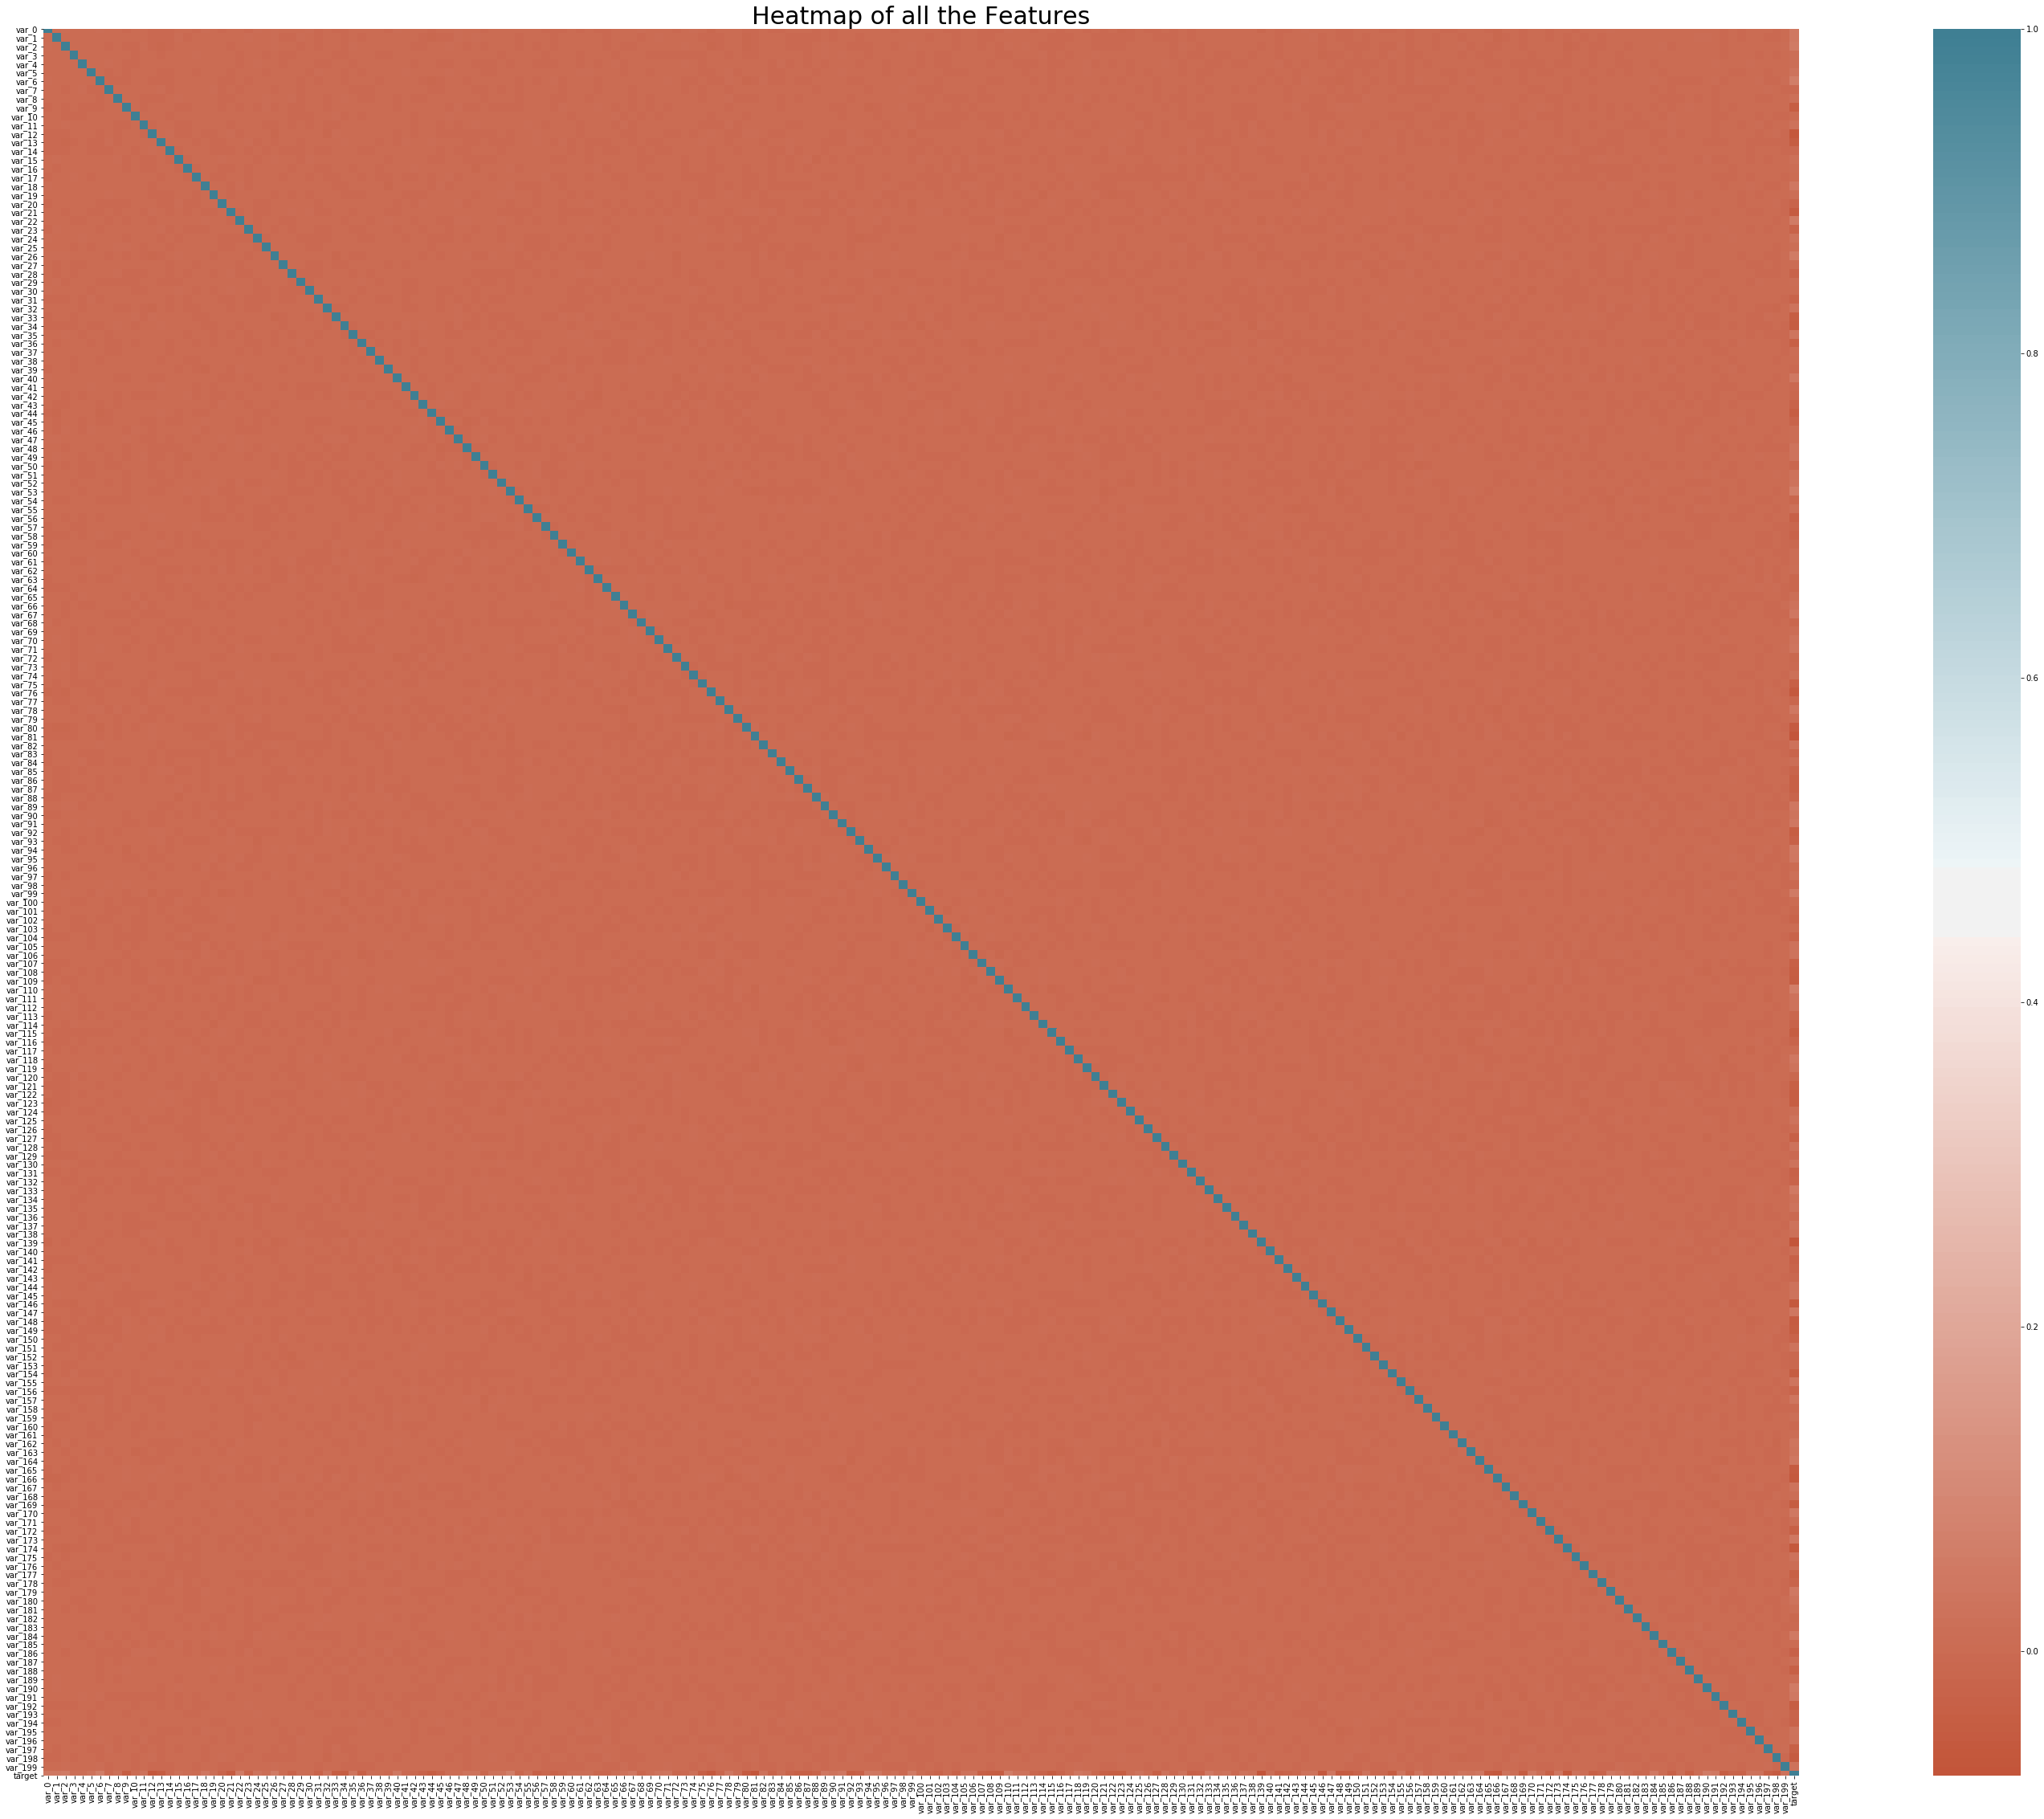

In [19]:
# plot heatmap 
# Set width and height of plot
f,ax = plt.subplots(figsize=(60,40))

# Generate correlation matrix
corr = santander_train.corr()

# plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(20, 220, n=200) ,square=True, ax=ax)
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

**In our dataset all the variables has a correlation coefficient < 0.08 due to that we are getting almost same color through the heatmap**

# Handle imbalance data

---



Class 0: 179902
Class 1: 20098


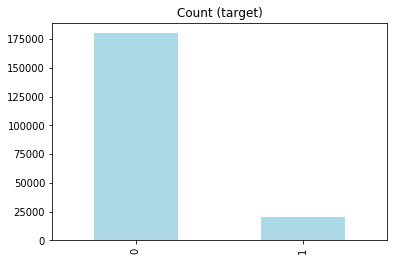

In [20]:
# view count of both class
target_count = santander_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

# barplot for view counts of both class
target_count.plot(kind='bar', title='Count (target)', color = "lightblue");

In [21]:
# spit data into dependent and independent variable
X = santander_train.values[:,0:200]
Y = santander_train.values[:,200]

In [22]:
# split data into four parts, train and test with dependent and independent
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1, stratify=Y)

In [23]:
# view data shape
print('Number of Training Examples = {}'.format(X_train.shape))
print('Number of Test Examples = {}\n'.format(X_test.shape))
print('Number of Training target  = {}'.format(y_train.shape))
print('Number of Test target = {}\n'.format(y_test.shape))

Number of Training Examples = (160000, 200)
Number of Test Examples = (40000, 200)

Number of Training target  = (160000,)
Number of Test target = (40000,)



In [24]:
# Use SMOTE technique to balance dataset
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

# view shape of dataset
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((287844, 200), (287844,), (40000, 200), (40000,))

Class 0: 143922
Class 1: 143922


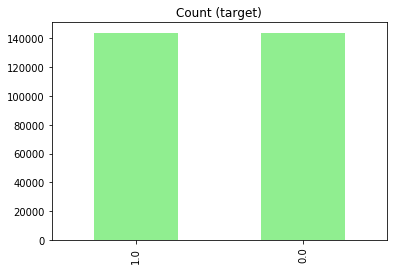

In [25]:
# verify balanced traget into train data
target_count = pd.DataFrame(y_train)[0].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

# barplot for view counts of both class
target_count.plot(kind='bar', title='Count (target)', color = "lightgreen");



---



# Feature scaling

In [30]:
# Normalization function
def normalize_data(df) :
  for i in range(0, df.shape[1]) :
    df.iloc[:,i] = (df.iloc[:,i] - (df.iloc[:,i].min()))/((df.iloc[:,i].max()) - (df.iloc[:,i].min()))

In [31]:
# Data Normalization
df_x_train = pd.DataFrame(X_train)
df_x_test = pd.DataFrame(X_test)
normalize_data(df_x_train)
normalize_data(df_x_test)

In [32]:
# View normalize data
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,...,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000,287844.000000
mean,0.509830,0.509493,0.512224,0.501160,0.502428,0.522355,0.511476,0.493306,0.525747,0.496441,...,0.514572,0.515826,0.490903,0.496909,0.492736,0.511048,0.516386,0.490239,0.480932,0.506726
std,0.140632,0.132886,0.139149,0.131375,0.134593,0.134243,0.139822,0.133140,0.133825,0.136924,...,0.165744,0.162719,0.161486,0.164572,0.157358,0.166161,0.165211,0.161540,0.171090,0.159774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435671,0.441876,0.436543,0.433034,0.435733,0.452576,0.438828,0.420314,0.454872,0.422800,...,0.399730,0.397682,0.380234,0.384483,0.376389,0.394726,0.389164,0.379111,0.365394,0.386257
50%,0.504129,0.504505,0.506317,0.499708,0.501679,0.519332,0.504565,0.493807,0.524033,0.500961,...,0.512281,0.510215,0.488608,0.499449,0.491121,0.507357,0.519519,0.488480,0.482760,0.513861
75%,0.578646,0.580386,0.583349,0.571350,0.572190,0.597391,0.582677,0.561868,0.603411,0.573892,...,0.626124,0.624733,0.598014,0.612929,0.609894,0.623026,0.643318,0.606155,0.604263,0.633706
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# View data shape
print('Number of Training Examples = {}'.format(X_train.shape))
print('Number of Test Examples = {}\n'.format(X_test.shape))
print('Number of Training target = {}'.format(y_train.shape))
print('Number of Test target  = {}\n'.format(y_test.shape))

Number of Training Examples = (287844, 200)
Number of Test Examples = (40000, 200)

Number of Training target = (287844,)
Number of Test target  = (40000,)





---

# **Model** **Development**


---



In [34]:
# function for plot ROC 
def plot_roc(model) :
  # calculate the fpr and tpr for all thresholds of the classification
  probs = model.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)

  # plot ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


# **Logistic Regression**

In [35]:
# build logistic regression
logistic_regresssion_model = LogisticRegression()
logistic_regresssion_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# predict logistic regression model
logit_predict = logistic_regresssion_model.predict(X_test)

In [37]:
# build confusion matrix
confusion_matrix_logit = pd.crosstab(y_test, logit_predict, rownames=['Actual'], colnames=['Predicted'])

# Let us save TN, TP, FN, FP
TP = confusion_matrix_logit.iloc[0,0]
FN = confusion_matrix_logit.iloc[0,1]
FP = confusion_matrix_logit.iloc[1,0]
TN = confusion_matrix_logit.iloc[1,1]

# check Accuracy
(TP + TN) * 100 / (TP+TN+FP+FN) 

70.38

In [38]:
# view confusion matrix
confusion_matrix_logit

Predicted,0.0,1.0
Actual,,
0.0,24915,11065
1.0,783,3237


In [39]:
# FNR
(FN * 100)/(TP + FN)

30.75319622012229

In [40]:
# Recall
(TP * 100)/(TP + FN)

69.24680377987771

In [41]:
# Precision
(FP * 100)/(TP + FP)

3.0469297221573663

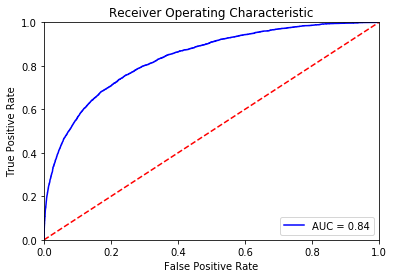

In [42]:
# plot ROC
plot_roc(logistic_regresssion_model)

**Logistic Regression perforamce matrix**


*   Accuracy - 70.51
*   Misclassification -  21.07
*   Recall - 69.40
*   Precision - 96.94
*   FNR - 30.59
*   AUC - 0.84








# **Random forest**

In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators = 150).fit(X_train, y_train)

In [50]:
random_forest_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
random_forest_prediction = random_forest_model.predict(X_test)

In [52]:
# build confusion matrix
confusion_matrix_random_forest = pd.crosstab(y_test, random_forest_prediction,  rownames=['Actual'], colnames=['Predicted'])

# Let us save TN, TP, FN, FP
TP = confusion_matrix_random_forest.iloc[0,0]
FN = confusion_matrix_random_forest.iloc[0,1]
FP = confusion_matrix_random_forest.iloc[1,0]
TN = confusion_matrix_random_forest.iloc[1,1]

# check Accuracy
(TP + TN) / (TP+TN+FP+FN) * 100

85.3625

In [53]:
confusion_matrix_random_forest

Predicted,0.0,1.0
Actual,,
0.0,33852,2128
1.0,3727,293


In [54]:
# FNR
(FN * 100)/(TP + FN)

5.914396887159533

In [55]:
# Recall
(TP * 100)/(TP + FN)

94.08560311284047

In [56]:
# Precision
(TP * 100)/(TP + FP)

90.08222677559276

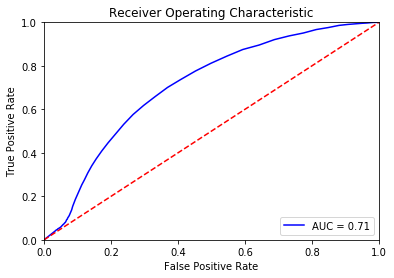

In [57]:
# plot ROC 
plot_roc(random_forest_model)

No handles with labels found to put in legend.


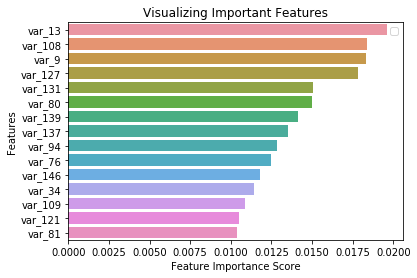

<Figure size 1080x1440 with 0 Axes>

In [59]:
# fearure importance plot
feature_imp = pd.Series(random_forest_model.feature_importances_, index = santander_train.columns.values[0:200]).sort_values(ascending=False)

# take top 15 features 
f_imp = feature_imp[0:15]

%matplotlib inline
# Creating a bar plot
sns.barplot(x=f_imp, y=f_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.figure(figsize=(15, 20))
plt.show()

**Random forest perforamce matrix**

```
number of trees 150
```


*   Accuracy - 85.39
*   Misclassification - 14.61
*   Recall - 94.09
*   Precision - 90.09
*   FNR - 5.90
*   AUC - 0.71




# **Naive bayes classifier**




In [0]:
# Build Naive bayes
naive_bayes_model = GaussianNB().fit(X_train,y_train)

In [0]:
# predict naive bayes
naive_bayes_predict = naive_bayes_model.predict(X_test)

In [62]:
# build confusion matrix
confusion_matrix_naive_bayes = pd.crosstab(y_test, naive_bayes_predict, rownames=['Actual'], colnames=['Predicted'])

# Let us save TN, TP, FN, FP
TP = confusion_matrix_naive_bayes.iloc[0,0]
FN = confusion_matrix_naive_bayes.iloc[0,1]
FP = confusion_matrix_naive_bayes.iloc[1,0]
TN = confusion_matrix_naive_bayes.iloc[1,1]

# check Accuracy
((TP + TN) / (TP+TN+FP+FN)) * 100 

83.285

In [63]:
# view confusion matrix
confusion_matrix_naive_bayes

Predicted,0.0,1.0
Actual,,
0.0,32938,3042
1.0,3644,376


In [64]:
# FNR
(FN * 100)/(TP + FN)

8.454697053918844

In [65]:
# Recall
(TP * 100) / (TP + FN)

91.54530294608115

In [66]:
# Precision
(TP * 100)/(TP + FP)

90.03881690448854

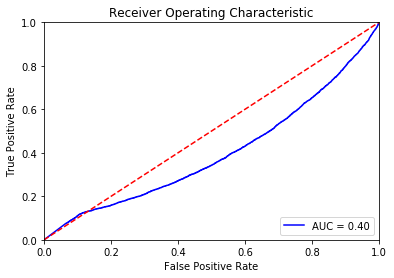

In [67]:
# plot ROC
plot_roc(naive_bayes_model)

**Naive Bayes perforamce matrix**


*   Accuracy - 83.27
*   Misclassification - 16.72
*   Recall - 91.53
*   Precision - 90.03
*   FNR - 8.46
*   AUC - 0.40



